In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import sklearn.linear_model

In [7]:
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')

In [8]:
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")

In [9]:
print(oecd_bli.head())

  LOCATION         Country INDICATOR                 Indicator MEASURE  \
0      AUS       Australia   JE_LMIS  Labour market insecurity       L   
1      AUT         Austria   JE_LMIS  Labour market insecurity       L   
2      BEL         Belgium   JE_LMIS  Labour market insecurity       L   
3      CAN          Canada   JE_LMIS  Labour market insecurity       L   
4      CZE  Czech Republic   JE_LMIS  Labour market insecurity       L   

  Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0   Value        TOT      Total        PC  Percentage               0   
1   Value        TOT      Total        PC  Percentage               0   
2   Value        TOT      Total        PC  Percentage               0   
3   Value        TOT      Total        PC  Percentage               0   
4   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value  Flag Codes  Flags  
0     Units                    NaN 

In [10]:
print(gdp_per_capita.head())

               Country                                 Subject Descriptor  \
0          Afghanistan  Gross domestic product per capita, current prices   
1              Albania  Gross domestic product per capita, current prices   
2              Algeria  Gross domestic product per capita, current prices   
3               Angola  Gross domestic product per capita, current prices   
4  Antigua and Barbuda  Gross domestic product per capita, current prices   

          Units  Scale                      Country/Series-specific Notes  \
0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
3  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
4  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   

        2015 Estimates Start After,,,  
0    599.994                    20

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data.

In [11]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [12]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]] 
y = np.c_[country_stats["Life satisfaction"]]

In [13]:
print(country_stats)

                 GDP per capita  Life satisfaction
Country                                           
Brazil                 8669.998                6.4
Mexico                 9009.280                6.5
Russia                 9054.914                5.8
Turkey                 9437.372                5.5
Poland                12495.334                6.1
Latvia                13618.569                5.9
Lithuania             14210.280                5.9
Slovak Republic       15991.736                6.2
Czech Republic        17256.918                6.7
Estonia               17288.083                5.7
Greece                18064.288                5.4
Portugal              19121.592                5.4
Slovenia              20732.482                5.9
Spain                 25864.721                6.3
Korea                 27195.197                5.9
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336

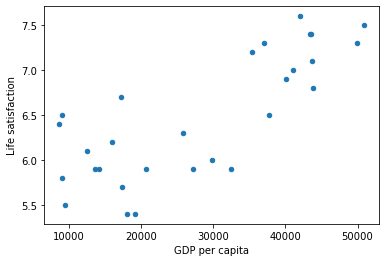

In [14]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [15]:
model = sklearn.linear_model.LinearRegression()

In [16]:
model.fit(X,y)

LinearRegression()

In [17]:
X_new = [[22587]] # Cyprus's GDP per capita print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [18]:
print(model.predict(X_new))

[[6.25984414]]
